# Using Metadensity in Jupter notebooks
This notebook showcases SF3B4, U2 density around branchpoints

In [1]:
# set up files associated with each genome coordinates
import metadensity as md
md.settings.from_config_file('/home/hsher/Metadensity/config/hg38.ini')


# then import the modules
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# I have a precompiles list of ENCODE datas as a csv that loads in this dataloader
import sys
sys.path.append('/home/hsher/Metadensity/scripts')
from dataloader import *
%matplotlib inline

plt.style.use('seaborn-white')

Using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
using /home/hsher/gencode_coords/GRCh38.p13.genome.fa
Using:  /home/hsher/gencode_coords/gencode.v33.transcript.gff3


## load RBPs into eCLIP object

In [2]:
#I have precompiled list of uID and the .bam, .bigWig files in the following dataframe.
# you need download from the ENCODE portal and make your own!
encode_data.loc[encode_data['RBP'].str.contains('U2AF')]

,uid,RBP,Cell line,bam_0,bam_1,bam_control,minus_0,minus_1,minus_control,plus_0,plus_1,plus_control,idr,bed_0,bed_1,clipper_0,clipper_1
21,242,U2AF2,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
23,244,U2AF1,K562,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
32,272,U2AF2,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...
37,282,U2AF1,HepG2,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab5/encode/EVN_eCLIP_analysis...,/projects/ps-yeolab3/encode/analysis/encode_GR...,/projects/ps-yeolab3/encode/analysis/encode_GR...


In [3]:
SF3B4 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'SF3B4')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)
SF3A3 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'SF3A3')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)
U2AF1 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'U2AF1')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)
U2AF2 = eCLIP.from_series(encode_data.loc[(encode_data['RBP'] == 'U2AF2')&(encode_data['Cell line'] == 'HepG2')].iloc[0],
                          single_end = False)
  


In [4]:
clips = [SF3B4, SF3A3, U2AF1, U2AF2]

# Calulcate Density and Truncation sites
Object `Metatruncation` and `Metadensity` takes three things:
1. an experiment object `eCLIP` or `STAMP`.
2. a set of transcript pyBedTools that you want to plot on
3. name of the object

Options include:
1. `sample_no=` allows you to decide how many transcript you want to build the density. It will take longer. By default, `sample_no=200`. So in transcript if you give more than 200 transcripts, only 200 will be used
2. `metagene` allows you to use pre-built metagene. This feature is more useful when you want to compare the same set of RNA over many RBPs.
3. `background_method` handles how you want to deal with IP v.s. Input
4. `normalize` handles how you want to normalize values within a transcript.

## Difference between truncation and density

`Metadensity` represents read coverage. `Metatruncation` represents the 5' end of read 2 for `eCLIP`; edit sites for `STAMP`.

In [5]:
# here for the set of transcript, we use the IDR peak containing transcript assuming they have good signal
def build_idr_metadensity(eCLIP):
    ''' build metadensity object for eCLIP and its idr peak containing transcript'''
    m = Metadensity(eCLIP, eCLIP.name,background_method = 'relative information', normalize = False)
    m.get_density_array()
    return m
def build_idr_metatruncate(eCLIP):
    ''' build metadensity object for eCLIP and its idr peak containing transcript'''
    m = Metatruncate(eCLIP, eCLIP.name,background_method = 'relative information', normalize = False)
    m.get_density_array(use_truncation = True)
    return m

In [6]:
# this step takes some time for building metagene from the annotation files.
den = [build_idr_metadensity(e) for e in clips]
trun = [build_idr_metatruncate(e) for e in clips]

Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


Using: /home/hsher/Metadensity/metadensity/data/hg38/gencode
Done building metagene


/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/metadensity.py:967: RuntimeWarning: Mean of empty slice
  feature_average  = np.nanmean(np.stack(all_feature_values), axis = 0)


## Visualize RBP map: individual density per transcript

use `feature_to_show` to decide what features to show. 

/home/hsher/miniconda3/envs/metadensity/lib/python3.7/site-packages/metadensity/plotd.py:187: RuntimeWarning: Mean of empty slice
  density_concat = np.nanmean(np.stack([den_arr[feat,align, r] for r in m.eCLIP.rep_keys]), axis = 0)


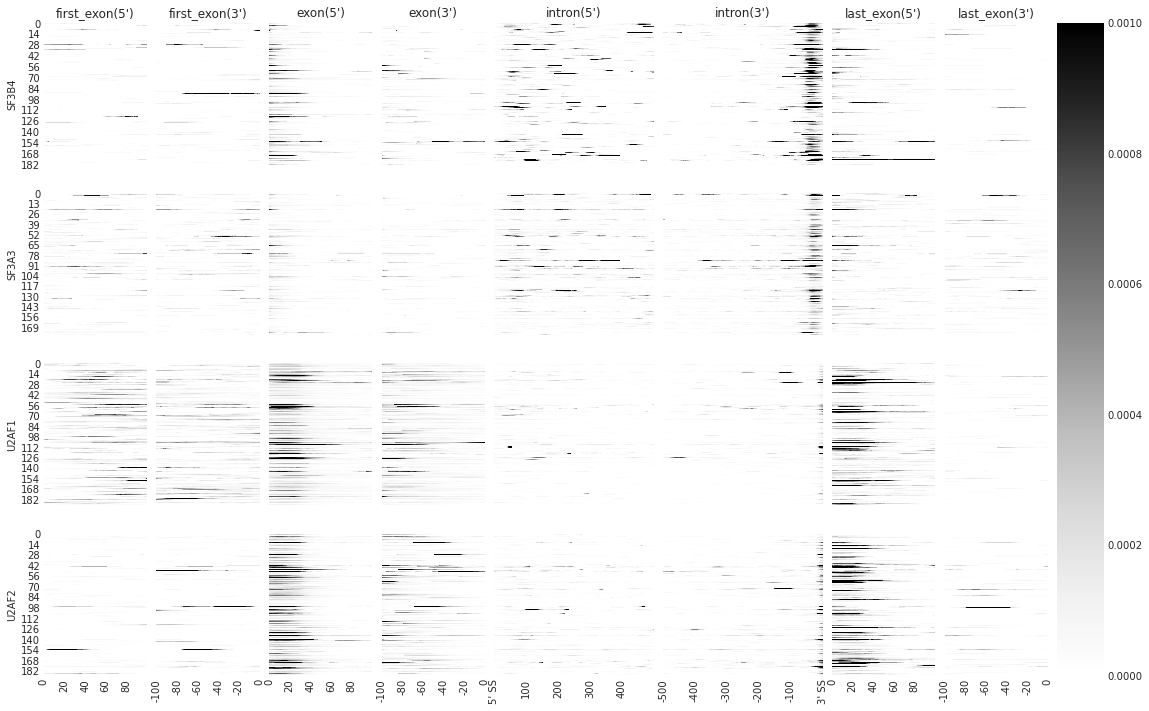

In [7]:
### PLOT INDIVIDUAL DENSITY
# you can customize the list of features you want to show. This is suitable when you are looking for splicing
f = plot_rbp_map(den, features_to_show = generic_rna)

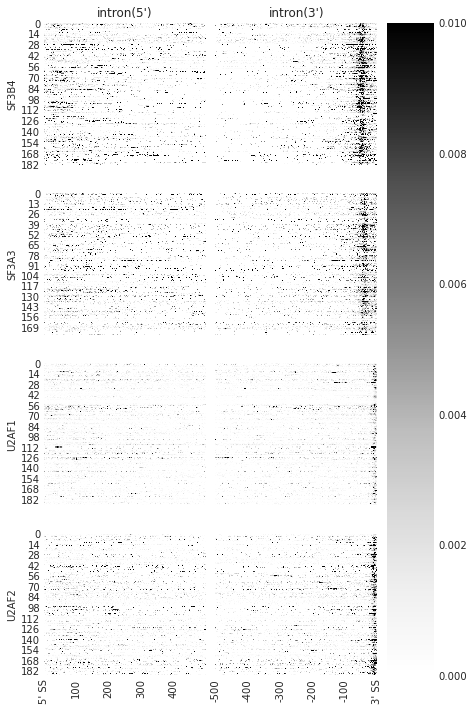

In [8]:
### PLOT INDIVIDUAL TRUNCATION SITES

f = plot_rbp_map(trun, features_to_show = ['intron'], cmap = 'Greys', ymax = 0.01)
f.savefig('SF3B4_rnamap.svg', dpi = 300)

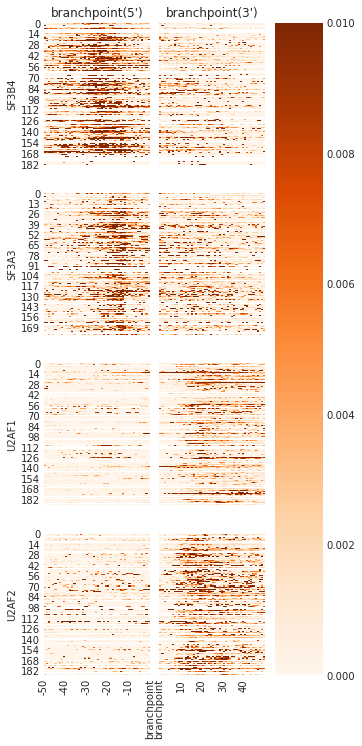

In [9]:
### PLOT INDIVIDUAL TRUNCATION SITES

f = plot_rbp_map(trun, features_to_show = ['branchpoint'], ymax = 0.01, cmap = 'Oranges')
f.savefig('SF3B4_brmap.svg', dpi = 300)

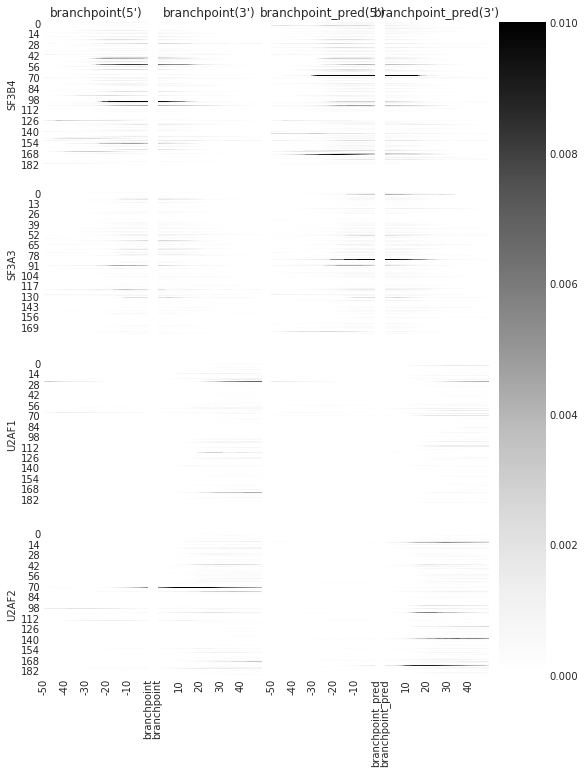

In [10]:
### PLOT INDIVIDUAL DENSITY SITES
f = plot_rbp_map(den, features_to_show = branchpoints, ymax = 0.01)

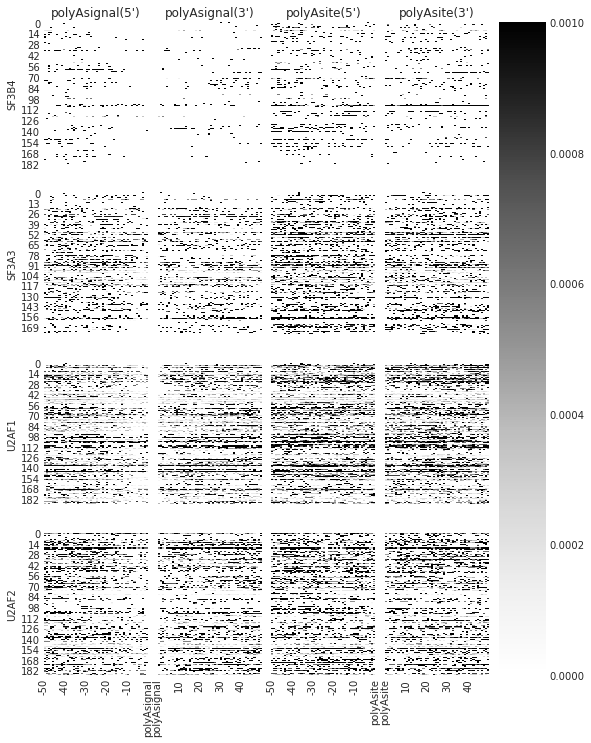

In [11]:
### PLOT INDIVIDUAL TRUNCATION SITES

f = plot_rbp_map(trun, features_to_show = polyAs, ymax = 0.001)

# Median and Mean density

In [14]:
color_dict = {'SF3B4': 'royalblue', 'SF3A3':'mediumorchid', 'U2AF1':'tomato', 'U2AF2': 'gold'}

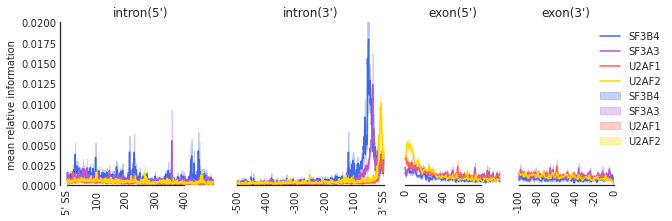

In [15]:
f=plot_mean_density(trun,
                    features_to_show = ['intron', 'exon'], ymax = 0.02,
                   color_dict = color_dict)
f=beautify(f, offset = 0) # sns.despine 
f.get_axes()[0].set_ylabel('mean relative information')
f.savefig('SF3B4_rna.svg', dpi = 300)

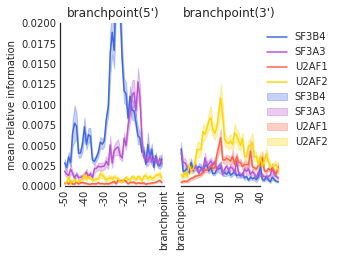

In [16]:

f=plot_mean_density(trun,
                    features_to_show = ['branchpoint'], ymax = 0.02,
                   color_dict = color_dict)
f.get_axes()[0].set_ylabel('mean relative information')
f=beautify(f, offset = 0) # sns.despine 
f.savefig('SF3B4_br.svg', dpi = 300)